## Zipf (1935)

Zipf tried several different approaches to the quantitative analysis of the distribution of words in corpora. His initial attempt, in 1935, sought to characterize the orderliness of word distributions by the relationship between the number of occurrences of a word, *b*, and the number of words *a*, a relationship Zipf expressed as $ab^2 = k$. For example, in Gratian's *dicta* there are 8,028 words (*a*) for which there is 1 (*b*) occurrence, 2,462 words (*a*) for which there are 2 (*b*) occurrences, 1,135 words (*a*) for which there are 3 (*b*) occurrences, and 660 words (*a*) for which there are 4 (*b*) occurrences. Plugging these values for *a* and *b* into the formula $ab^2 = k$ yields 8,028, 9,848, 10,215, and 10,560 respectively as values for the "constant" *k*. As the number of occurrences *b* increases, values of *k* for Gratian's *dicta* remain fairly stable, mostly falling between 10,000 and 11,000.

As this example suggests, the explanatory power of the formula $ab^2 = k$ to characterize a word distribution is greatest for words that have a low number of occurrences. Zipf ultimately judged the formula $ab^2 = k$ to be a less than satisfactory model for the full spectrum of word distribution in a corpus, in part because it implied fractional values of *a* for the most frequent words.[^z3] Zipf had a vivid awareness, ahead of its time for the pre-digital age in which he lived, of the fact that the variables in the formulas by which he sought to express these relationships represent discrete rather than continuous quantities.[^z4] **Zipf also noted that value of the exponent of b is likely to differ from 2 depending on the size of the corpus (Zipf 1935, 43).**

[^z3]: "Hence the $ab^2 = k$ relationship is valid only for the less frequently occurring words which, however, represent the greater part of the vocabulary in use, though not always a great majority of the occurrences." ... "It is perhaps worth pointing out that the $ab^2 = k$ relationship which appears valid for the frequency distribution of the less frequent words would demand fractional words when applied to the speech-elements of highest occurrence, such as *the* in English." @zipf_psycho-biology_1935, 42-43.

[^z4]: Zipf used the term "integrality" to describe the discrete, discontinuous, nature of frequency and rank. @zipf_human_1949, 31, 35.

The $ab^2 = k$ interpretation of Zipf's law can be restated with greater mathematical generality by noting that if the variables are plotted logarithmically, the relationship is linear, with the slope determined by the power (exponent) relationship involved. In the equation $ab^2 = k$, the number of occurrences *b* varies inversely as the square root of the number of words *a* (as $\frac{1}{\sqrt{a}}$ , or equivalently as $a^{-1/2}$). The relationship of the logarithm of the number of occurrences to the number of words is linear, with a slope of -1/2 corresponding to the exponent (-1/2) of the number of words. (See Figure Zy below for actual data from Gratian's *dicta* for values of *b* \[Number of Occurrences\] from 1 to 30. The actual slope is -0.5097, quite close to the predicted theoretical value of -0.5.)

### Theoretical

In [1]:
def zipf_1935_theoretical(k, **kwargs):
    '''theoretical 1935 Zipf distribution'''
    if 'slope' in kwargs:
        slope = kwargs['slope']
        exponent = -1 / slope
    else:
        exponent = 2.0
    words = []
    occurrences = []
    a = k
    b = 1
    while a > 1.0:
        a = k / pow(b, exponent)
        words.append(round(a))
        occurrences.append(b)
        b += 1
    word_occurrence_pairs = list(zip(words, occurrences))
    return word_occurrence_pairs

In [2]:
import math

def logify(data_points):
    x_tmp, y_tmp = zip(*data_points)
    x_values = list(x_tmp)
    y_values = list(y_tmp)
    x_log = [math.log(x) for x in x_values]
    y_log = [math.log(y) for y in y_values]
    return list(zip(x_log, y_log))

In [3]:
import matplotlib.pyplot as pp

def plot_data_scatter(data_points):
    x_values, y_values = zip(*data_points)
    pp.scatter(x_values, y_values)
    pp.xlabel('$log_{e}$ rank')
    pp.ylabel('$log_{e}$ frequency')

In [4]:
import statistics

def regression_slope(data_points):
    n = len(data_points)
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    xy_sum = 0
    x_squared_sum = 0
    for i in range(n):
        xy_sum += x_values[i] * y_values[i]
        x_squared_sum += x_values[i] ** 2
    return (xy_sum - n * x_bar * y_bar) / (x_squared_sum - n * x_bar ** 2)

In [5]:
def plot_regression(data_points):
    x_values, y_values = zip(*data_points)
    x_bar = statistics.mean(x_values)
    y_bar = statistics.mean(y_values)
    slope = regression_slope(data_points)
    x_values = [0, max(x_values)]
    y_values = []
    for x in x_values:
        y_values.append(y_bar + slope * (x - x_bar))
    pp.plot(x_values, y_values)
    return slope

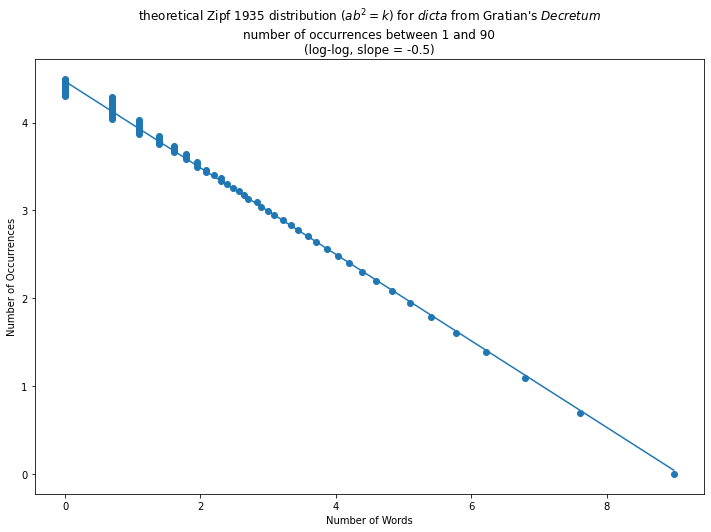

In [6]:
scale = 8028 # There are 8,028 hapax (b = 1) words in Gratian's dicta
data_points = zipf_1935_theoretical(scale)
pp.figure(figsize=(12, 8)) # Jupyter
# pp.figure(figsize=(7.2, 5.6), dpi=300) # print
plot_data_scatter(logify(data_points))
slope = plot_regression(logify(data_points))
pp.xlabel('Number of Words')
pp.ylabel('Number of Occurrences')
pp.title(
    'theoretical Zipf 1935 distribution ($ab^2 = k$) for $\it{dicta}$ from Gratian\'s $\it{Decretum}$\n' +
    f'number of occurrences between 1 and {len(data_points)}\n(log-log, slope = {slope:.1f})'
)
# pp.savefig('./PNGs/Figure_Zx')
pp.show()

### Actual

In [7]:
import re

def get_tokens(filename):
    '''open text file and return list of tokens'''
    # text = open(filename, 'r').read().lower()
    f = open(filename, 'r') # open file
    text = f.read() # read file
    text = text.lower() # lower-case text
    tokens = [word for word in re.split('\W', text) if word != ''] # remove punctuation
    return tokens

In [8]:
def get_features(samples):
    tokens = []
    for sample in samples:
        tokens += get_tokens('../corpus/' + sample + '.txt')
    types = list(set(tokens)) # create unordered list of unique words
    tmp = dict.fromkeys(types, 0) # create temporary dictionary, initialize counts to 0
    for token in tokens: tmp[token] += 1 # count words
    # re-order words in temporary dictionary numerically by descending frequency
    # re-order words with same frequency alphabetically
    features = { 
        key: value for key, value in sorted(tmp.items(),
        key = lambda item: (-item[1], item[0]))
    }
    return features

In [9]:
def zipf_1935_actual(features, limit):
    words = []
    occurrences = []
    for b in range(1, limit + 1): # Number of Occurrences (b)
        a = 0 # Number of Words (a)
        for value in list(features.values()):
            if value == b: a += 1
        if a == 0: continue # log(0) throws ValueError: math domain error 
        words.append(a)
        occurrences.append(b)
    word_occurrence_pairs = list(zip(words, occurrences))
    return word_occurrence_pairs

In [10]:
import pandas as pd

samples = ['Gratian0', 'Gratian1', 'dePen', 'Gratian2']
features = get_features(samples)
limit = 30 # Figure_Zy
# limit = len(features) # Figure_Zz
data_points = zipf_1935_actual(features, limit)
words, occurrences = zip(*data_points)
df = pd.DataFrame({'b': pd.Series(list(occurrences)), 'a': pd.Series(list(words))})
df['$b^2$'] = df['b'] ** 2
df['k'] = df['a'] * df['$b^2$']
df.head(10)

,b,a,$b^2$,k
0,1,8028,1,8028
1,2,2462,4,9848
2,3,1135,9,10215
3,4,660,16,10560
4,5,423,25,10575
5,6,290,36,10440
6,7,225,49,11025
7,8,173,64,11072
8,9,137,81,11097
9,10,120,100,12000


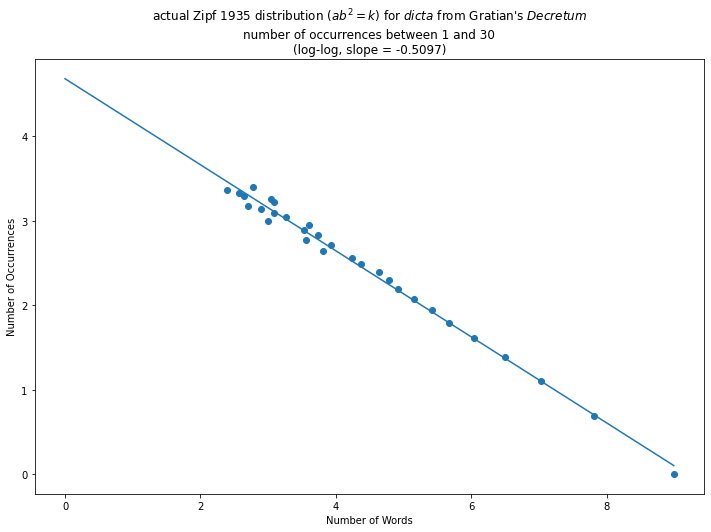

In [11]:
pp.figure(figsize=(12, 8)) # Jupyter
# pp.figure(figsize=(6.4, 5.6), dpi=300) # print
plot_data_scatter(logify(data_points))
slope = plot_regression(logify(data_points))
pp.xlabel('Number of Words')
pp.ylabel('Number of Occurrences')
pp.title(
    'actual Zipf 1935 distribution ($ab^2 = k$) for $\it{dicta}$ from Gratian\'s $\it{Decretum}$\n' +
    f'number of occurrences between 1 and {len(data_points)}\n(log-log, slope = {slope:.4f})'
)
# pp.savefig('./PNGs/Figure_Zy')
# pp.savefig('./PNGs/Figure_Zz')
pp.show()